In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset into a pandas DataFrame
data = pd.read_csv('data_1.csv')

In [2]:
data.head()

,inc_number,busapp_u_id,inc_caller_id,inc_priority,inc_incident_state,inc_category,inc_assignment_group,inc_cmdb_ci,inc_business_service,inc_problem_id,...,First colon,Second colon,Trimmed issue,Directors,System Status,Nayan Scope,CSOC flag,Bucket 1,Bucket 2,Monitoring
0,INC2461064,APP06119,Smart Plus / Monitor IT,P2,Closed,Application,ZCFISD01,APP06119-PROD-OFS,APP06119-PROD-OFS,NaN,...,10,10,blp06119008-Interface has been disabled pofs.P...,Neil Percival,Legacy Transitional,No,0,Interface has been disabled,Interface has been disabled,Smart Plus / Monitor IT
1,INC2490221,APP06119,Smart Plus / Monitor IT,P2,Closed,Application,UKOCSOCS,APP06119-PROD-OFS,APP06119-PROD-OFS,NaN,...,10,29,PP06119:02;MDAID:5009276:Consumer_-_L2C_-_OFS_...,Neil Percival,Legacy Transitional,No,0,MDAID,0,Smart Plus / Monitor IT
2,INC2123817,APP06119,Event Management,P2,Closed,Application,ZCFISD01,APP06119-PROD-OFS,APP06119-PROD-OFS,NaN,...,10,10,Unexpected low load - RMI requests on WebLogic...,Neil Percival,Legacy Transitional,No,0,Unexpected low/high load,Unexpected low load,Dynatrace
3,INC2299303,APP06119,Smart Plus / Monitor IT,P2,Closed,Application,UKOCSOCS,APP06119-PROD-OFS,APP06119-PROD-OFS,NaN,...,10,29,PP06119:07;MDAID:4928834:Consumer_-_L2C_-_OFS_...,Neil Percival,Legacy Transitional,No,0,MDAID,MDAID - IIPMAL EE order fail,Smart Plus / Monitor IT
4,INC2284709,APP06119,Event Management,P2,Closed,Application,ZCFISD01,APP06119-PROD-OFS,APP06119-PROD-OFS,NaN,...,10,10,Unexpected low load - MDListener,Neil Percival,Legacy Transitional,No,0,Unexpected low/high load,Unexpected low load,Dynatrace


In [3]:
data.columns

Index(['inc_number', 'busapp_u_id', 'inc_caller_id', 'inc_priority',
       'inc_incident_state', 'inc_category', 'inc_assignment_group',
       'inc_cmdb_ci', 'inc_business_service', 'inc_problem_id',
       'deliveryunit2_manager', 'inc_opened_at', 'inc_resolved_at',
       'inc_short_description', 'inc_close_notes', 'inc_close_code',
       'MTTR (mins)', 'Breach', 'MTTR Buckets', 'Week', 'First colon',
       'Second colon', 'Trimmed issue', 'Directors', 'System Status',
       'Nayan Scope', 'CSOC flag', 'Bucket 1', 'Bucket 2', 'Monitoring'],
      dtype='object')

In [4]:
data.info

<bound method DataFrame.info of        inc_number busapp_u_id             inc_caller_id inc_priority  \
0      INC2461064    APP06119  Smart Plus / Monitor IT            P2   
1      INC2490221    APP06119  Smart Plus / Monitor IT            P2   
2      INC2123817    APP06119         Event Management            P2   
3      INC2299303    APP06119  Smart Plus / Monitor IT            P2   
4      INC2284709    APP06119         Event Management            P2   
...           ...         ...                       ...          ...   
23914  INC2585248    APP06119               Jodi Walker           P4   
23915  INC2590058    APP06119           Abbie Patterson           P4   
23916  INC2574986    APP06119               Ellie Pyatt           P4   
23917  INC2569955    APP06119               Kevin Booth           P4   
23918  INC2564964    APP06119            Letitia Holman           P4   

      inc_incident_state inc_category inc_assignment_group  \
0                 Closed  Application    

#### 1. Nature of Incidents:

In [5]:
# Define a function to categorize incidents based on their nature
def categorize_incident_nature(row):
    if 'Application' in row['inc_category']:
        return 'Application Issues'
    elif 'Event Management' in row['inc_category']:
        return 'Event Management Events'
    elif 'Monitoring' in row['inc_category']:
        return 'Monitoring Alerts'
    else:
        return 'Other'
# Create a new column 'Incident Nature' and apply the categorization function
data['Incident Nature'] = data.apply(categorize_incident_nature, axis=1)

# Display the resulting DataFrame with the new 'Incident Nature' column
data[['inc_number', 'inc_category', 'Incident Nature']]

,inc_number,inc_category,Incident Nature
0,INC2461064,Application,Application Issues
1,INC2490221,Application,Application Issues
2,INC2123817,Application,Application Issues
3,INC2299303,Application,Application Issues
4,INC2284709,Application,Application Issues
...,...,...,...
23914,INC2585248,Application,Application Issues
23915,INC2590058,Application,Application Issues
23916,INC2574986,Application,Application Issues
23917,INC2569955,Application,Application Issues


#### 2. Priority and Resolution

In [6]:
# Define a function to categorize incidents based on priority and resolution
def categorize_priority_resolution(row):
    priority = row['inc_priority']
    resolution = str(row['inc_close_notes']).lower() if 'inc_close_notes' in row and not pd.isna(row['inc_close_notes']) else ''

    if priority == 'P2' and 'closed' in row['inc_incident_state'].lower():
        if 'solved (work around)' in resolution:
            return 'P2 - Solved (Work Around)'
        elif 'solved (permanently)' in resolution:
            return 'P2 - Solved (Permanently)'
        elif 'bau' in resolution:
            return 'P2 - Business as Usual (bau)'
        elif 'solved remotely (permanently)' in resolution:
            return 'P2 - Solved Remotely (Permanently)'
        else:
            return 'P2 - Other Resolutions'
    else:
        return 'Other'
    
# Create a new column 'Priority and Resolution' and apply the categorization function
data['Priority and Resolution'] = data.apply(categorize_priority_resolution, axis=1)
# Display the resulting DataFrame with the new 'Priority and Resolution' column
data[['inc_number', 'inc_priority', 'inc_incident_state', 'inc_close_notes', 'Priority and Resolution']]

,inc_number,inc_priority,inc_incident_state,inc_close_notes,Priority and Resolution
0,INC2461064,P2,Closed,"Hi Team,_x000D_\nInterface is enabled. Hence r...",P2 - Other Resolutions
1,INC2490221,P2,Closed,cleared,P2 - Other Resolutions
2,INC2123817,P2,Closed,no issues,P2 - Other Resolutions
3,INC2299303,P2,Closed,bau,P2 - Business as Usual (bau)
4,INC2284709,P2,Closed,Closed the task associated with alert: Alert15...,P2 - Other Resolutions
...,...,...,...,...,...
23914,INC2585248,P4,Resolved,LOB: PSG (Non KCI) Action/SR/Ticket: INC258524...,Other
23915,INC2590058,P4,New,NaN,Other
23916,INC2574986,P4,Resolved,LOB: PSG (Non KCI) _x000D_\n_x000D_\nAction/SR...,Other
23917,INC2569955,P4,Resolved,"Hi Team,_x000D_\n_x000D_\n_x000D_\nAll Lineite...",Other


#### 3. Incident Categories and Assignment:

In [7]:
# Define a function to categorize incidents based on incident categories and assignment groups
def categorize_incident_categories_assignment(row):
    category = row['inc_category']
    assignment_group = row['inc_assignment_group']

    if 'Application' in category:
        if assignment_group in ['ZCFISD01', 'UKOCSOCS']:
            return 'Application - Assigned to Specific Groups'
        else:
            return 'Application - Other Assignments'
    else:
        return 'Other'

# Create a new column 'Incident Categories and Assignment' and apply the categorization function
data['Incident Categories and Assignment'] = data.apply(categorize_incident_categories_assignment, axis=1)

# Display the summary and important highlights
summary = data['Incident Categories and Assignment'].value_counts()

print("Summary of Incident Categories and Assignment:")
print(summary)

Summary of Incident Categories and Assignment:
Application - Assigned to Specific Groups    12380
Other                                         7916
Application - Other Assignments               3623
Name: Incident Categories and Assignment, dtype: int64


#### 4. Incident States

In [8]:
# Define a function to categorize incidents based on incident states
def categorize_incident_states(row):
    incident_state = row['inc_incident_state'].lower()

    if 'closed' in incident_state or 'cleared' in incident_state:
        return 'Closed or Cleared'
    else:
        return 'Other'

# Create a new column 'Incident States' and apply the categorization function
data['Incident States'] = data.apply(categorize_incident_states, axis=1)

# Display the summary and important highlights
summary = data['Incident States'].value_counts()

print("Summary of Incident States:")
print(summary)

# Display additional highlights (e.g., counts for each incident state type)
print("\nImportant Highlights:")
for incident_state_type in summary.index:
    count = summary[incident_state_type]
    print(f"{incident_state_type}: {count} incidents")

Summary of Incident States:
Closed or Cleared    21749
Other                 2170
Name: Incident States, dtype: int64

Important Highlights:
Closed or Cleared: 21749 incidents
Other: 2170 incidents


#### 5. MTTR (Mean Time to Resolve) and Breach:

In [9]:
# Convert 'MTTR (mins)' to numeric, handling errors with coerce to replace non-numeric values with NaN
data['MTTR (mins)'] = pd.to_numeric(data['MTTR (mins)'], errors='coerce')

# Define a function to categorize incidents based on MTTR and Breach information
def categorize_mttr_breach(row):
    mttr = row['MTTR (mins)']
    breach = row['Breach'].lower()

    if not pd.isna(mttr):
        if mttr <= 60 and breach == 'not breached':
            return 'MTTR <= 60 mins - Not Breached'
        elif mttr > 60 and breach == 'not breached':
            return 'MTTR > 60 mins - Not Breached'
        elif breach == 'breached':
            return 'Breach'
    return 'Other'

# Create a new column 'MTTR and Breach' and apply the categorization function
data['MTTR and Breach'] = data.apply(categorize_mttr_breach, axis=1)

# Display the summary and important highlights
summary = data['MTTR and Breach'].value_counts()

print("Summary of MTTR and Breach:")
print(summary)

# Display additional highlights (e.g., counts for each MTTR and Breach category)
print("\nImportant Highlights:")
for mttr_breach_type in summary.index:
    count = summary[mttr_breach_type]
    print(f"{mttr_breach_type}: {count} incidents")

Summary of MTTR and Breach:
Other                             16877
MTTR > 60 mins - Not Breached      5102
MTTR <= 60 mins - Not Breached     1940
Name: MTTR and Breach, dtype: int64

Important Highlights:
Other: 16877 incidents
MTTR > 60 mins - Not Breached: 5102 incidents
MTTR <= 60 mins - Not Breached: 1940 incidents


#### 6. Buckets and Monitoring

In [10]:
# Define a function to categorize incidents based on buckets and monitoring
def categorize_buckets_monitoring(row):
    buckets = row['Bucket 1']
    monitoring = row['Monitoring']

    if pd.notna(buckets) and pd.notna(monitoring):
        return 'Buckets and Monitoring'
    elif pd.notna(buckets):
        return 'Buckets Only'
    elif pd.notna(monitoring):
        return 'Monitoring Only'
    else:
        return 'Other'

# Create a new column 'Buckets and Monitoring' and apply the categorization function
data['Buckets and Monitoring'] = data.apply(categorize_buckets_monitoring, axis=1)

# Display the summary and important highlights
summary = data['Buckets and Monitoring'].value_counts()

print("Summary of Buckets and Monitoring:")
print(summary)

# Display additional highlights (e.g., counts for each Buckets and Monitoring category)
print("\nImportant Highlights:")
for buckets_monitoring_type in summary.index:
    count = summary[buckets_monitoring_type]
    print(f"{buckets_monitoring_type}: {count} incidents")

Summary of Buckets and Monitoring:
Buckets and Monitoring    23919
Name: Buckets and Monitoring, dtype: int64

Important Highlights:
Buckets and Monitoring: 23919 incidents


#### 7.Date and Time:

In [11]:
# Convert 'inc_opened_at' and 'inc_resolved_at' to datetime
data['inc_opened_at'] = pd.to_datetime(data['inc_opened_at'])
data['inc_resolved_at'] = pd.to_datetime(data['inc_resolved_at'])

# Calculate the time taken to resolve incidents
data['Time to Resolve'] = (data['inc_resolved_at'] - data['inc_opened_at']).dt.total_seconds() / 60  # Convert to minutes

# Display the summary and important highlights
print("Summary of Time to Resolve:")
print(data['Time to Resolve'].describe())

# Display additional highlights (e.g., average time to resolve)
average_time_to_resolve = data['Time to Resolve'].mean()
print(f"\nAverage Time to Resolve: {average_time_to_resolve:.2f} minutes")


Summary of Time to Resolve:
count     23488.00000
mean      -2469.39650
std       95413.18776
min     -479602.00000
25%          76.00000
50%        1452.00000
75%       11351.50000
max      481402.00000
Name: Time to Resolve, dtype: float64

Average Time to Resolve: -2469.40 minutes


#### 8. Directors, System Status, and CSOC Flag:

In [12]:
# Convert 'inc_opened_at' and 'inc_resolved_at' to datetime
data['inc_opened_at'] = pd.to_datetime(data['inc_opened_at'])
data['inc_resolved_at'] = pd.to_datetime(data['inc_resolved_at'])

# Filter out cases where resolved timestamp is earlier than opened timestamp
data = data[data['inc_resolved_at'] >= data['inc_opened_at']]

# Calculate the time taken to resolve incidents
data['Time to Resolve'] = (data['inc_resolved_at'] - data['inc_opened_at']).dt.total_seconds() / 60  # Convert to minutes

# Display the summary and important highlights
print("Summary of Time to Resolve:")
print(data['Time to Resolve'].describe())

# Display additional highlights (e.g., average time to resolve)
average_time_to_resolve = data['Time to Resolve'].mean()
print(f"\nAverage Time to Resolve: {average_time_to_resolve:.2f} minutes")

Summary of Time to Resolve:
count     19829.000000
mean      28307.726310
std       59780.275622
min           0.000000
25%         397.000000
50%        2745.000000
75%       33611.000000
max      481402.000000
Name: Time to Resolve, dtype: float64

Average Time to Resolve: 28307.73 minutes


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


#### 9. Nayan Scope:

In [13]:
# Define a function to categorize incidents based on directors, system status, and CSOC flag
def categorize_directors_system_csoc(row):
    directors = row['Directors']
    system_status = row['System Status']
    csoc_flag = row['CSOC flag']

    if pd.notna(directors) or pd.notna(system_status) or pd.notna(csoc_flag):
        return 'Potentially Relevant to Cybersecurity'
    else:
        return 'Other'

# Create a new column 'Cybersecurity Relevance' and apply the categorization function
data['Cybersecurity Relevance'] = data.apply(categorize_directors_system_csoc, axis=1)

# Display the summary and important highlights
summary = data['Cybersecurity Relevance'].value_counts()

print("Summary of Cybersecurity Relevance:")
print(summary)

# Display additional highlights (e.g., counts for each Cybersecurity Relevance category)
print("\nImportant Highlights:")
for relevance_type in summary.index:
    count = summary[relevance_type]
    print(f"{relevance_type}: {count} incidents")

Summary of Cybersecurity Relevance:
Potentially Relevant to Cybersecurity    19829
Name: Cybersecurity Relevance, dtype: int64

Important Highlights:
Potentially Relevant to Cybersecurity: 19829 incidents


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


#### 10. Trimmed Issue and Short Description

In [14]:
# Convert 'inc_opened_at' and 'inc_resolved_at' to datetime
data['inc_opened_at'] = pd.to_datetime(data['inc_opened_at'])
data['inc_resolved_at'] = pd.to_datetime(data['inc_resolved_at'])

# Explicitly create a copy of the DataFrame to avoid SettingWithCopyWarning
data_copy = data.copy()

# Filter out cases where resolved timestamp is earlier than opened timestamp using .loc on the copy
data_copy.loc[data_copy['inc_resolved_at'] >= data_copy['inc_opened_at'], 'Time to Resolve'] = (
    data_copy['inc_resolved_at'] - data_copy['inc_opened_at']
).dt.total_seconds() / 60  # Convert to minutes

# Display the summary and important highlights
print("Summary of Time to Resolve:")
print(data_copy['Time to Resolve'].describe())

# Display additional highlights (e.g., average time to resolve)
average_time_to_resolve = data_copy['Time to Resolve'].mean()
print(f"\nAverage Time to Resolve: {average_time_to_resolve:.2f} minutes")


Summary of Time to Resolve:
count     19829.000000
mean      28307.726310
std       59780.275622
min           0.000000
25%         397.000000
50%        2745.000000
75%       33611.000000
max      481402.000000
Name: Time to Resolve, dtype: float64

Average Time to Resolve: 28307.73 minutes


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### 11. Additional Flags and Markers:

In [15]:
# Define a function to categorize incidents based on Nayan Scope
def categorize_nayan_scope(row):
    nayan_scope = row['Nayan Scope']

    if pd.notna(nayan_scope):
        return 'Scope Present'
    else:
        return 'No Scope Information'

# Create a new column 'Nayan Scope Category' and apply the categorization function
data['Nayan Scope Category'] = data.apply(categorize_nayan_scope, axis=1)

# Display the summary and important highlights
summary = data['Nayan Scope Category'].value_counts()

print("Summary of Nayan Scope Category:")
print(summary)

# Display additional highlights (e.g., counts for each Nayan Scope Category)
print("\nImportant Highlights:")
for scope_category in summary.index:
    count = summary[scope_category]
    print(f"{scope_category}: {count} incidents")


Summary of Nayan Scope Category:
Scope Present    19829
Name: Nayan Scope Category, dtype: int64

Important Highlights:
Scope Present: 19829 incidents


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


#### 12. Event Management with Dynatrace:

In [16]:
# Define a function to categorize incidents based on Trimmed Issue and Short Description
def categorize_trimmed_issue_short_description(row):
    trimmed_issue = row['Trimmed issue']
    short_description = row['inc_short_description']

    if pd.notna(trimmed_issue) or pd.notna(short_description):
        return 'Issue Details Present'
    else:
        return 'No Issue Details'

# Create a new column 'Issue Details Category' and apply the categorization function
data['Issue Details Category'] = data.apply(categorize_trimmed_issue_short_description, axis=1)

# Display the summary and important highlights
summary = data['Issue Details Category'].value_counts()

print("Summary of Issue Details Category:")
print(summary)

# Display additional highlights (e.g., counts for each Issue Details Category)
print("\nImportant Highlights:")
for details_category in summary.index:
    count = summary[details_category]
    print(f"{details_category}: {count} incidents")


Summary of Issue Details Category:
Issue Details Present    19829
Name: Issue Details Category, dtype: int64

Important Highlights:
Issue Details Present: 19829 incidents


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


#### 13. CSOC Flag and Monitoring:

In [17]:
# Define a function to categorize incidents based on additional flags and markers
def categorize_flags_markers(row):
    bucket1 = row['Bucket 1']
    bucket2 = row['Bucket 2']
    monitoring = row['Monitoring']

    if pd.notna(bucket1) or pd.notna(bucket2) or pd.notna(monitoring):
        return 'Additional Flags or Markers Present'
    else:
        return 'No Additional Flags or Markers'

# Create a new column 'Flags and Markers Category' and apply the categorization function
data['Flags and Markers Category'] = data.apply(categorize_flags_markers, axis=1)

# Display the summary and important highlights
summary = data['Flags and Markers Category'].value_counts()

print("Summary of Flags and Markers Category:")
print(summary)

Summary of Flags and Markers Category:
Additional Flags or Markers Present    19829
Name: Flags and Markers Category, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


#### 14. Event Management with Dynatrace:

In [18]:
# Define a function to categorize incidents related to Event Management with Dynatrace
def categorize_event_management_dynatrace(row):
    event_management_category = row['inc_category']
    dynatrace_related = 'Dynatrace' in str(row['Trimmed issue']).lower()

    if event_management_category == 'Event Management' and dynatrace_related:
        return 'Event Management with Dynatrace'
    else:
        return 'Other'

# Create a new column 'Event Management Category' and apply the categorization function
data['Event Management Category'] = data.apply(categorize_event_management_dynatrace, axis=1)

# Display the summary and important highlights
summary = data['Event Management Category'].value_counts()

print("Summary of Event Management Category:")
print(summary)

Summary of Event Management Category:
Other    19829
Name: Event Management Category, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


#### 13. CSOC Flag and Monitoring:

In [19]:
def categorize_csoc_flag_monitoring(row):
    csoc_flag = row['CSOC flag']
    monitoring = row['Monitoring']

    if pd.notna(csoc_flag) or pd.notna(monitoring):
        return 'CSOC Flag or Monitoring Present'
    else:
        return 'No CSOC Flag or Monitoring'

# Create a new column 'CSOC Flag and Monitoring Category' and apply the categorization function
data['CSOC Flag and Monitoring Category'] = data.apply(categorize_csoc_flag_monitoring, axis=1)

# Display the summary and important highlights
summary = data['CSOC Flag and Monitoring Category'].value_counts()

print("Summary of CSOC Flag and Monitoring Category:")
print(summary)

Summary of CSOC Flag and Monitoring Category:
CSOC Flag or Monitoring Present    19829
Name: CSOC Flag and Monitoring Category, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


#### 14. Communication in Close Notes:

In [20]:
# Define a function to categorize incidents based on communication in Close Notes
def categorize_communication_in_close_notes(row):
    close_notes = row['inc_close_notes']

    if pd.notna(close_notes):
        return 'Communication in Close Notes'
    else:
        return 'No Communication in Close Notes'

# Create a new column 'Communication in Close Notes Category' and apply the categorization function
data['Communication in Close Notes Category'] = data.apply(categorize_communication_in_close_notes, axis=1)

# Display the summary and important highlights
summary = data['Communication in Close Notes Category'].value_counts()

print("Summary of Communication in Close Notes Category:")
print(summary)


Summary of Communication in Close Notes Category:
Communication in Close Notes    19829
Name: Communication in Close Notes Category, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


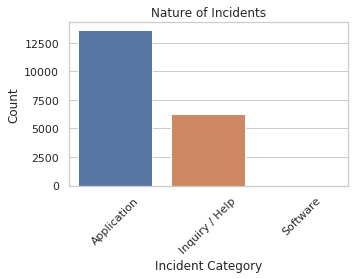

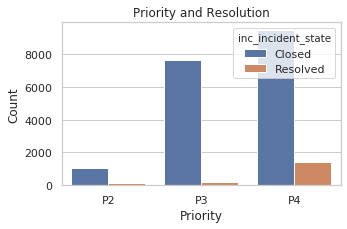

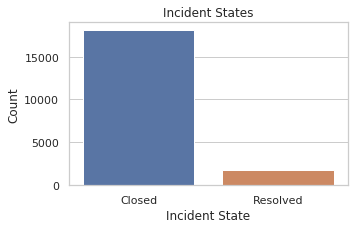

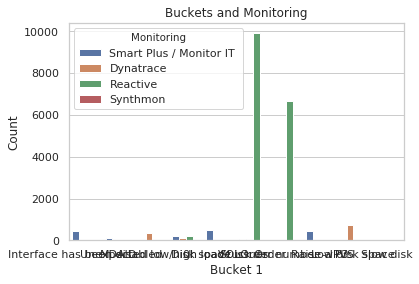

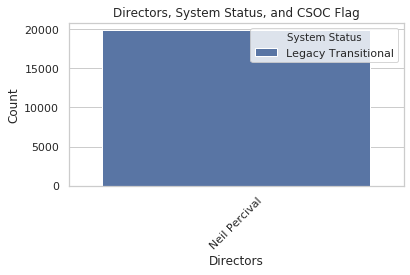

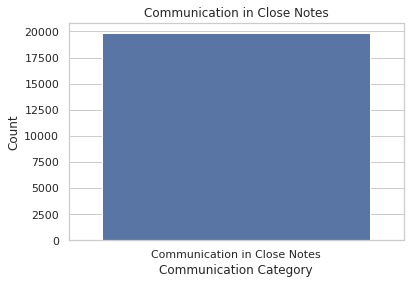

In [21]:

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Visualization 1: Nature of Incidents
plt.figure(figsize=(5, 3))
sns.countplot(x='inc_category', data=data)
plt.title('Nature of Incidents')
plt.xlabel('Incident Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Visualization 2: Priority and Resolution
plt.figure(figsize=(5, 3))
sns.countplot(x='inc_priority', hue='inc_incident_state', data=data)
plt.title('Priority and Resolution')
plt.xlabel('Priority')
plt.ylabel('Count')
plt.show()

# Visualization 3: Incident States
plt.figure(figsize=(5, 3))
sns.countplot(x='inc_incident_state', data=data)
plt.title('Incident States')
plt.xlabel('Incident State')
plt.ylabel('Count')
plt.show()

# # Visualization 4: MTTR and Breach
# plt.figure(figsize=(8, 6))
# sns.histplot(data=data, x='MTTR (mins)', kde=True)
# plt.title('Distribution of MTTR')
# plt.xlabel('MTTR (mins)')
# plt.ylabel('Frequency')
# plt.show()

# Visualization 5: Buckets and Monitoring
plt.figure(figsize=(6, 4))
sns.countplot(x='Bucket 1', hue='Monitoring', data=data)
plt.title('Buckets and Monitoring')
plt.xlabel('Bucket 1')
plt.ylabel('Count')
plt.show()

# Visualization 6: Directors, System Status, and CSOC Flag
plt.figure(figsize=(6, 3))
sns.countplot(x='Directors', hue='System Status', data=data)
plt.title('Directors, System Status, and CSOC Flag')
plt.xlabel('Directors')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Visualization 7: Communication in Close Notes
plt.figure(figsize=(6, 4))
sns.countplot(x='Communication in Close Notes Category', data=data)
plt.title('Communication in Close Notes')
plt.xlabel('Communication Category')
plt.ylabel('Count')
plt.show()
